### WEATHER PROJECT

In [9]:
pip install pandas matplotlib seaborn scikit-learn


In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [23]:
# Step 1: Load the Data
df = pd.read_csv('weather.csv')

In [32]:
# Display the first few rows of the DataFrame to understand its structure
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [33]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [34]:
#Problem statement
#solution approach
#eda--exploratory data analysis-->clean, info(),columns, null,outliers,duplicate(),describe(),dtype
#feature selection -----> independent(Vif) , dependent
#train and test split --->80:20
#model building
#train
#test
#model performance

In [35]:
df.shape

(366, 22)

In [36]:
df.info

<bound method DataFrame.info of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           

In [37]:
df.isna

<bound method DataFrame.isna of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           

In [38]:
df.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [39]:
#df.dropna(inplace=True)


In [40]:
df['MinTemp'].mean()

7.265573770491804

In [41]:
df['MaxTemp'].median()

19.65

In [42]:
df['Rainfall'].mode()

0    0.0
Name: Rainfall, dtype: float64

In [43]:
df['Rainfall'].value_counts()

0.0     263
0.2      17
0.6       6
0.8       5
0.4       5
1.0       4
6.6       3
1.8       3
5.2       3
4.8       3
2.0       3
4.0       3
3.4       3
1.2       3
3.6       2
3.8       2
1.4       2
3.0       2
6.4       2
11.0      2
17.4      2
1.6       2
16.2      2
2.6       1
8.2       1
7.2       1
7.6       1
19.2      1
6.2       1
9.8       1
7.4       1
16.8      1
19.8      1
18.8      1
10.4      1
4.4       1
9.0       1
2.2       1
12.2      1
14.4      1
5.4       1
4.2       1
22.6      1
25.8      1
2.8       1
39.8      1
13.2      1
Name: Rainfall, dtype: int64

In [44]:
df['Rainfall'].mode()[0]

0.0

In [45]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [46]:
col=list(df.columns)

In [47]:
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [48]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

### Data Visulization 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

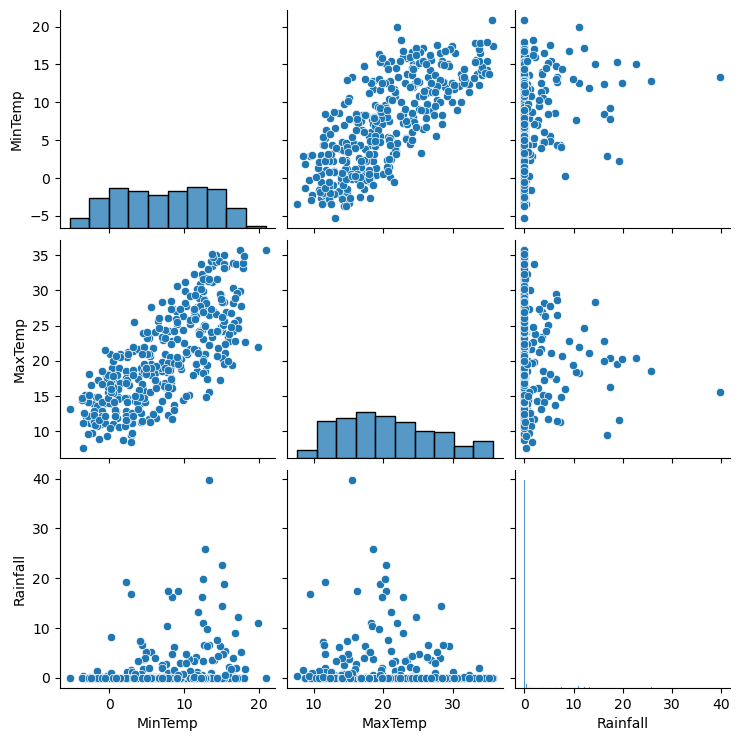

In [8]:

sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [33]:
# Feature Engineering 
# Data Analysis (analyze each term)
#Calculate average MaxTemp by month
df['MinTemp'] = pd.to_datetime(df['MinTemp'])
df['Rainfall'] = df['MinTemp'].dt.month
MaxTemp = df.groupby('Rainfall')['MaxTemp'].mean()


### Data Visulization (Part - 2)

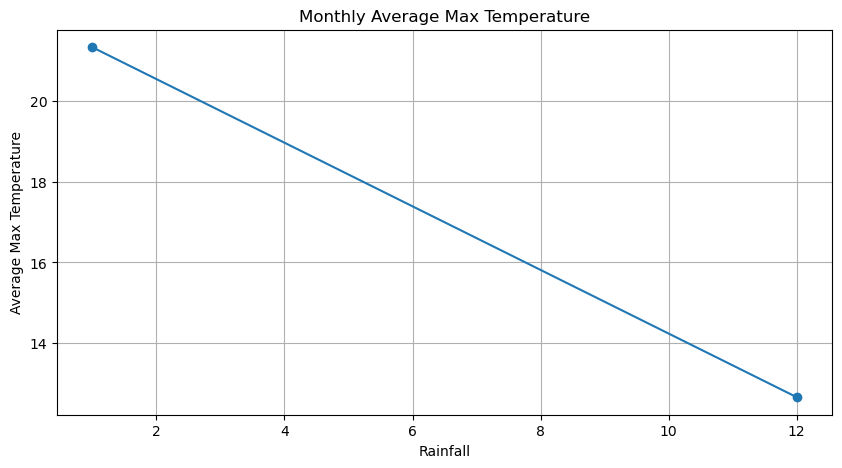

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(MaxTemp.index, MaxTemp.values, marker='o')
plt.xlabel('Rainfall')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

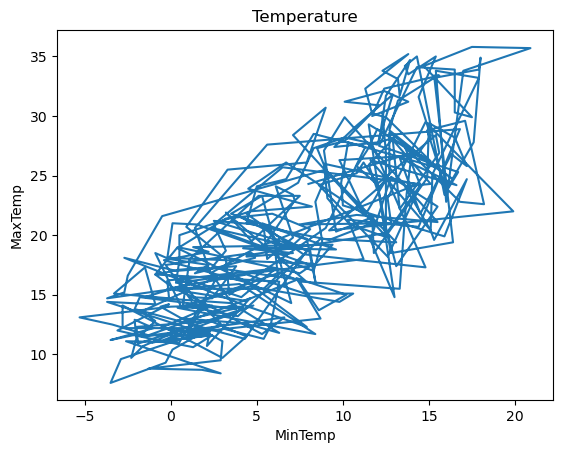

In [73]:
# Create a line plot of the temperature data
plt.plot(df['MinTemp'], df['MaxTemp'])

# Set the title and labels of the plot
plt.title('Temperature')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')

# Show the plot
plt.show()

In [74]:
# Save the plot as a PNG image
plt.savefig('df.png')

<Figure size 640x480 with 0 Axes>

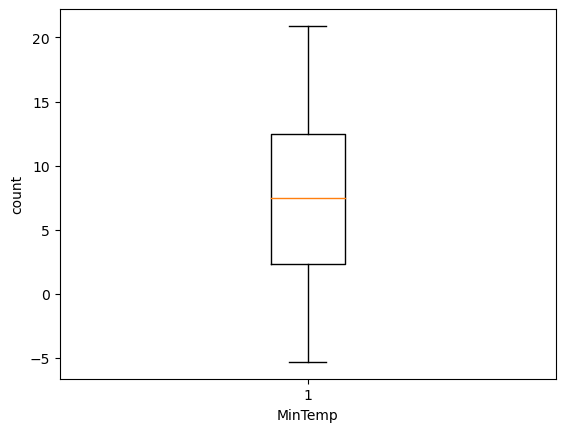

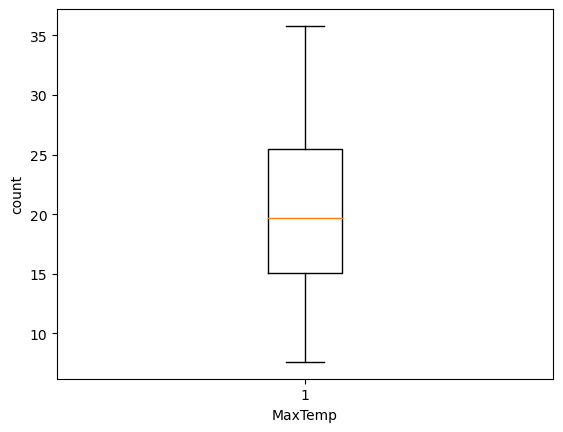

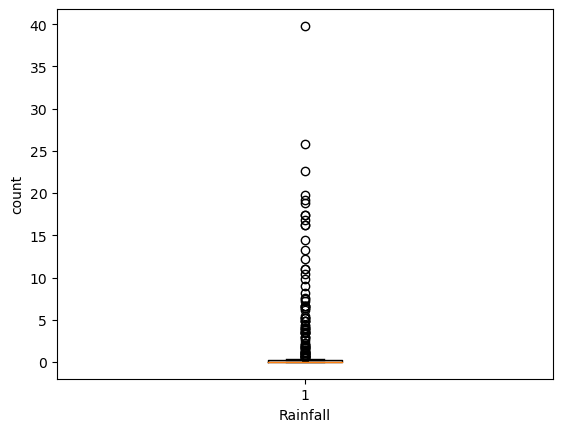

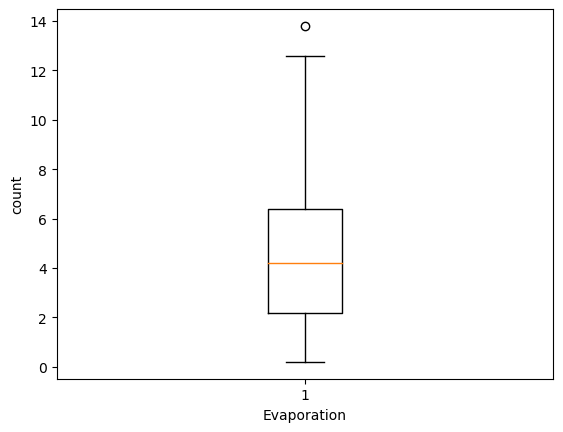

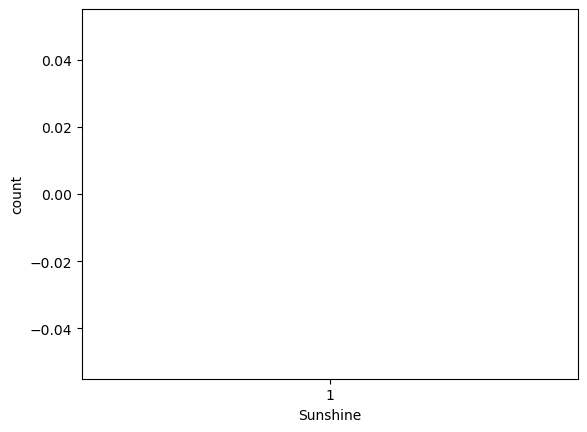

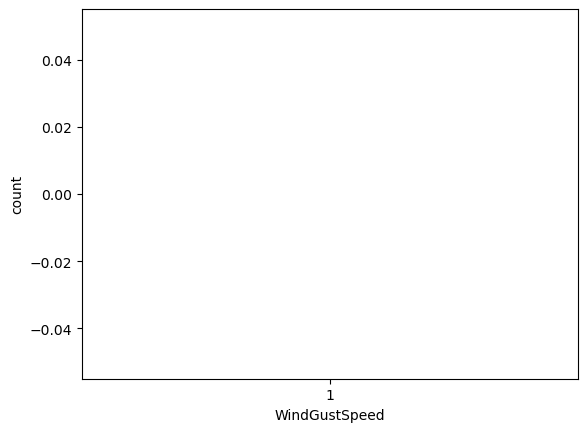

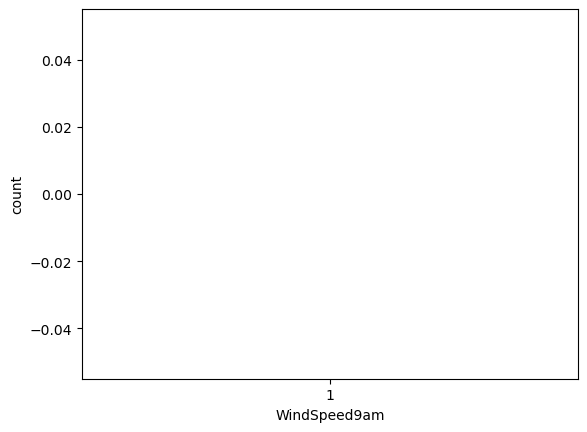

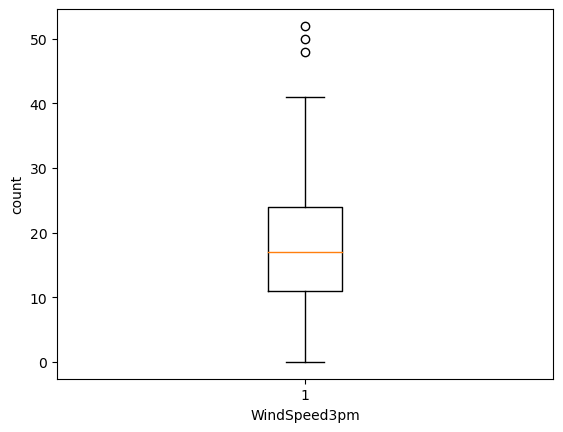

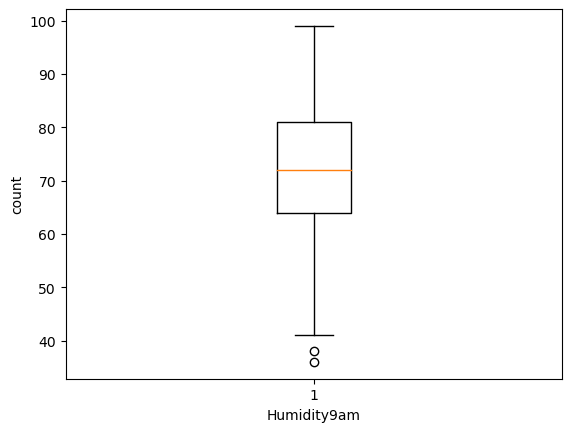

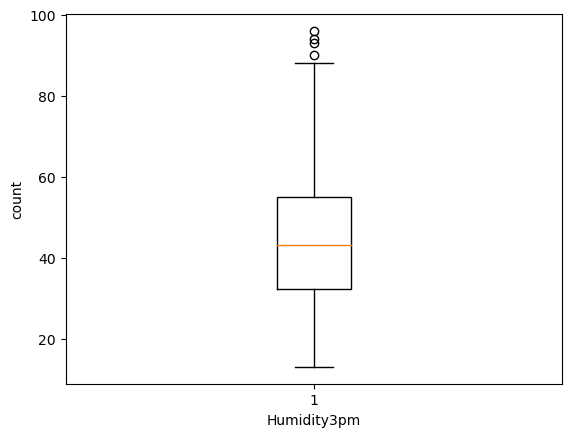

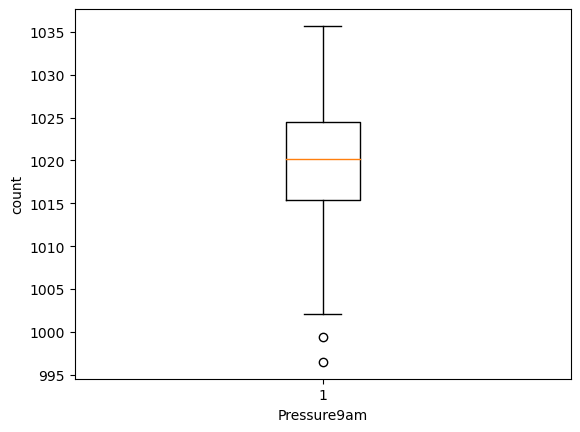

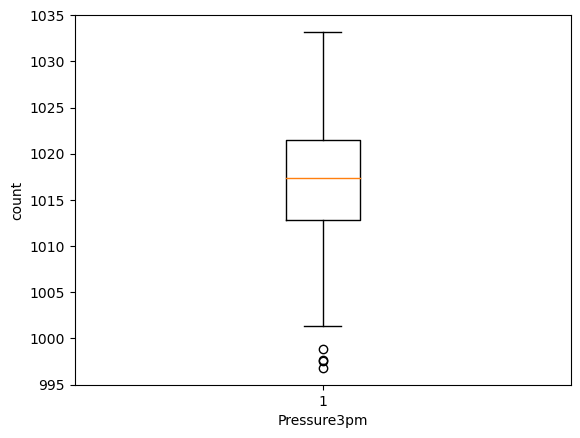

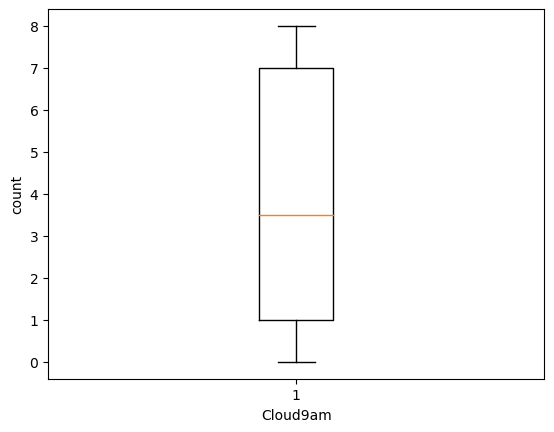

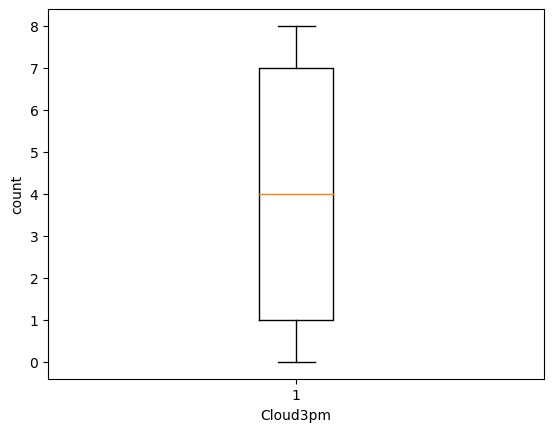

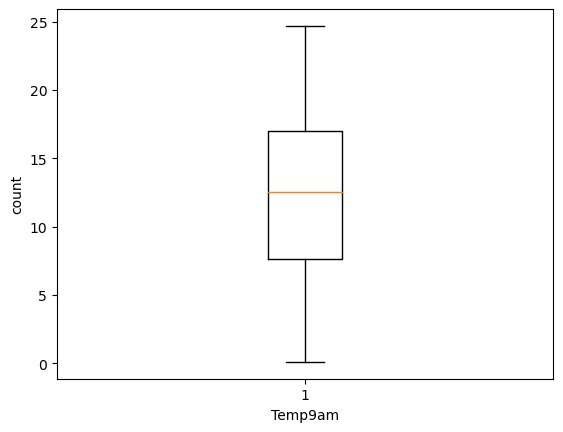

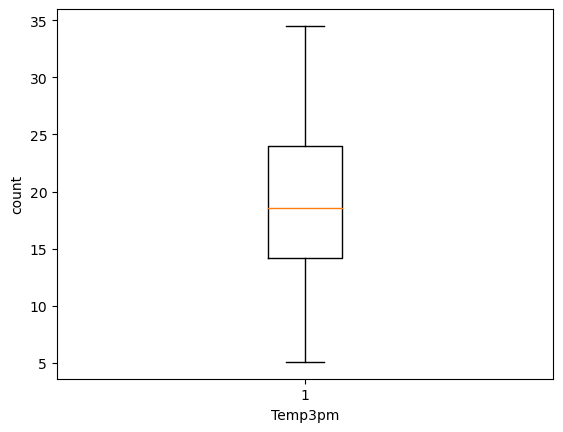

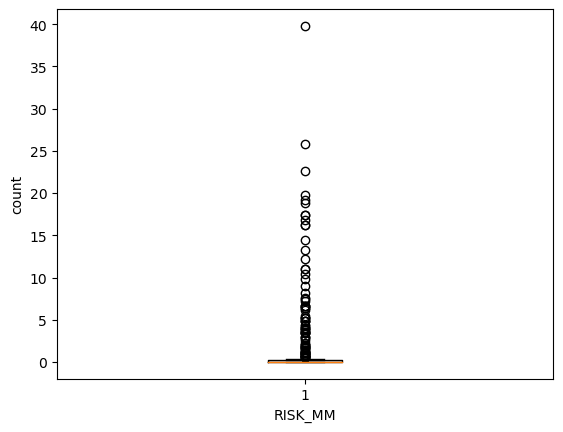

In [49]:
for col_name in col:
    if(df[col_name].dtypes == "int64" or df[col_name].dtypes == "float64"):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()
    

In [ ]:
col1=[bmi, past_consultations,hospital_expenditure,number_of_past_hospitalizations,annal_salary]
for col_name in col:
    if(df[col_name].dtypes == "int64" or df[col_name].dtypes == "float64"):
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col_name] >= Q1 -1.5*IQR) & (df[col_name] <= Q3 + 1.5*IQR) ]

        

In [55]:
df

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000008,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1970-01-01 00:00:00.000000014,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
1970-01-01 00:00:00.000000013,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
1970-01-01 00:00:00.000000013,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
1970-01-01 00:00:00.000000007,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000009,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
1970-01-01 00:00:00.000000007,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
1970-01-01 00:00:00.000000012,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No


In [ ]:
#feature selection

In [56]:
df.corr()

C:\Users\Bhuli\AppData\Local\Temp\ipykernel_158592\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MaxTemp,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752
Pressure9am,-0.290883,-0.331581,-0.381906,0.006276,-0.540180,-0.356332,-0.359800,0.135727,-0.087946,1.000000,0.967895,-0.157553,-0.141000,-0.460418,-0.253674,-0.290584


In [57]:
df.columns

Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [81]:
# To find the mean Rainfall, wind speed a
print(df['Rainfall'].mean())
print(df['WindGustSpeed'].mean())


1.428415300546448
39.84065934065934


In [128]:
df = df['Pressure3pm'].var()
print("df: ", df)

df:  41.853426154652496


In [154]:
df.drop(columns=df[['WindDir9am', 'WindDir3pm']],axis=1,inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


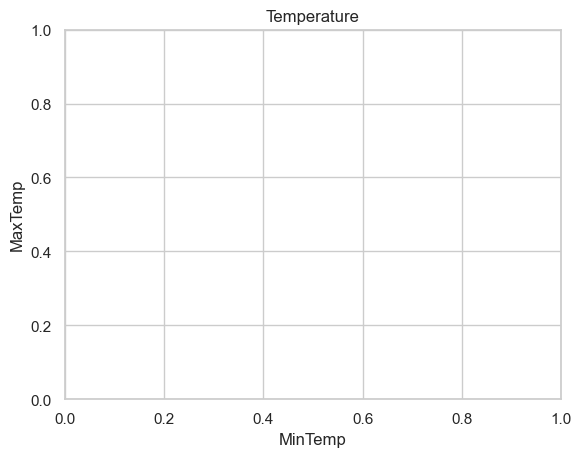

Correlation Coefficient: -0.07961593547048454


In [239]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Assuming data is a 2D array where the first column is the continuous variable X and the second column is the continuous variable Y
df = np.random.rand(400, 8)

# Create pair plots for the continuous variables
sns.set(style="whitegrid")


# Assuming 'weather.csv' is a CSV file containing the weather dataset
data = pd.read_csv('weather.csv')

# Define the numeric variables of interest (e.g., temperature, humidity, wind speed)
numeric_variables = ['WindGustDir','WindGustSpeed', 'WindDir9am', 'WindDir3pm']



# Set the title and labels of the plot
plt.title('Temperature')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')


# Display the plot
plt.show()

# Calculate the correlation coefficient between the variables X and Y
correlation_coefficient = np.corrcoef(df[:, 0], df[:, 1])[0, 1]

# Display the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

In [159]:
#loading the dataset
#import pandas library
import pandas as pd
#reading the data
df = pd.read_csv('weather.csv')

In [160]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [162]:
# Providing the input and output data
# importing numpy library
import numpy as np

In [163]:
#the input data (x, regressor)
x = np.array(df["MinTemp"]).reshape(-1,1)

In [164]:
x.shape

(366, 1)

In [165]:
print(x)

[[ 8. ]
 [14. ]
 [13.7]
 [13.3]
 [ 7.6]
 [ 6.2]
 [ 6.1]
 [ 8.3]
 [ 8.8]
 [ 8.4]
 [ 9.1]
 [ 8.5]
 [10.1]
 [12.1]
 [10.1]
 [12.4]
 [13.8]
 [11.7]
 [12.4]
 [15.6]
 [15.3]
 [16.4]
 [12.8]
 [12. ]
 [15.4]
 [15.6]
 [13.3]
 [12.9]
 [15.1]
 [13.6]
 [15.1]
 [11.6]
 [16.6]
 [13.3]
 [14.5]
 [16.3]
 [17.2]
 [16.5]
 [15. ]
 [14.9]
 [11.8]
 [11.7]
 [ 9.6]
 [ 8.9]
 [10.1]
 [15.5]
 [10.8]
 [ 7.5]
 [12.8]
 [12.6]
 [14.8]
 [19.9]
 [ 9.2]
 [12.4]
 [11.3]
 [ 9.8]
 [14.3]
 [15.1]
 [14.4]
 [15.4]
 [13.8]
 [13.6]
 [14.3]
 [15.9]
 [16.7]
 [12.1]
 [14.3]
 [16.5]
 [16.5]
 [17.5]
 [14.7]
 [17.5]
 [20.9]
 [17. ]
 [16. ]
 [15.4]
 [17.9]
 [15.2]
 [15.1]
 [15.3]
 [17.2]
 [15.9]
 [10. ]
 [ 9.9]
 [10.3]
 [15.4]
 [12.7]
 [13.2]
 [15.3]
 [17.9]
 [18. ]
 [17.6]
 [16. ]
 [14.9]
 [17.1]
 [18.2]
 [16.8]
 [13.6]
 [14.5]
 [12.4]
 [10.4]
 [ 9.1]
 [ 8.9]
 [14.5]
 [12.6]
 [ 8.6]
 [10.8]
 [11.2]
 [12.1]
 [10.8]
 [11.4]
 [12. ]
 [16.3]
 [12.7]
 [12.7]
 [12. ]
 [11.5]
 [13. ]
 [11.7]
 [14.8]
 [ 7.7]
 [ 4.4]
 [ 7.4]
 [ 8.3]
 [10.1]


In [166]:
print(type(x))

<class 'numpy.ndarray'>


In [167]:
#the input data (x, regressor)
y = np.array(df["MinTemp"])

In [168]:
y.shape

(366,)

In [170]:
print(y)

[ 8.  14.  13.7 13.3  7.6  6.2  6.1  8.3  8.8  8.4  9.1  8.5 10.1 12.1
 10.1 12.4 13.8 11.7 12.4 15.6 15.3 16.4 12.8 12.  15.4 15.6 13.3 12.9
 15.1 13.6 15.1 11.6 16.6 13.3 14.5 16.3 17.2 16.5 15.  14.9 11.8 11.7
  9.6  8.9 10.1 15.5 10.8  7.5 12.8 12.6 14.8 19.9  9.2 12.4 11.3  9.8
 14.3 15.1 14.4 15.4 13.8 13.6 14.3 15.9 16.7 12.1 14.3 16.5 16.5 17.5
 14.7 17.5 20.9 17.  16.  15.4 17.9 15.2 15.1 15.3 17.2 15.9 10.   9.9
 10.3 15.4 12.7 13.2 15.3 17.9 18.  17.6 16.  14.9 17.1 18.2 16.8 13.6
 14.5 12.4 10.4  9.1  8.9 14.5 12.6  8.6 10.8 11.2 12.1 10.8 11.4 12.
 16.3 12.7 12.7 12.  11.5 13.  11.7 14.8  7.7  4.4  7.4  8.3 10.1 12.
 12.9 10.8  9.5 12.1 12.5 13.9 13.3 13.2 12.3 13.8 11.3 11.7 12.5 15.1
 11.5 13.  11.6 12.8 15.5 13.1 12.6  4.4  4.4  7.1  4.2  9.6  3.5  5.3
  7.   0.4  3.2  5.9  8.1  6.9  5.6  7.2  7.1  6.1  7.1  5.6  5.4  6.3
  5.3  7.9  8.4  8.1  2.4  5.6  7.5  2.5  5.   3.8  7.9  4.3 -2.1 -1.8
  3.8  2.1  0.5 -0.9  0.4  7.5  8.3 -0.2  0.1  1.5  8.3  9.4  1.3  2.2
 -0.4  4

In [169]:
print(type(y))

<class 'numpy.ndarray'>


In [171]:
#splitting the dataset
#import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [172]:
#Eploring the train and testn datasets
x_train.shape

(256, 1)

In [173]:
x_test.shape

(110, 1)

In [174]:
y_train.shape

(256,)

In [175]:
y_test.shape

(110,)

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8,random_state = 42)

In [178]:
x_train

array([[ 0.3],
       [ 3.8],
       [15.4],
       [10.3],
       [11.3],
       [13.8],
       [14.3],
       [ 0.8],
       [ 8.3],
       [12.7],
       [11.5],
       [ 7.5],
       [ 2.4],
       [ 0.5],
       [-0.2],
       [11.4],
       [ 1.1],
       [13.8],
       [ 0.4],
       [ 2.4],
       [13.3],
       [ 8.6],
       [11.5],
       [11.7],
       [ 4.4],
       [15.4],
       [ 7.9],
       [ 0.7],
       [ 3.2],
       [ 2.4],
       [15.1],
       [ 8.1],
       [ 5.4],
       [ 9. ],
       [ 1.4],
       [ 3.2],
       [-2. ],
       [ 4. ],
       [ 5.9],
       [15.6],
       [ 4.4],
       [15.3],
       [ 8.4],
       [12.4],
       [-0.6],
       [12.6],
       [-2.9],
       [11.7],
       [11.6],
       [17.2],
       [ 0.1],
       [-1.8],
       [ 5.1],
       [-3.3],
       [ 5.3],
       [ 2.4],
       [ 5.6],
       [15.4],
       [12. ],
       [13.1],
       [ 6.1],
       [ 9. ],
       [-2.6],
       [ 9.1],
       [ 5.3],
       [14.5],
       [15

In [41]:
#  Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### LinearRegression

In [43]:
# Create and train a linear regression model
df = LinearRegression()
df.fit(X_train, y_train)


LinearRegression()

In [44]:
# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')


Mean Squared Error for Rainfall Prediction: 37.0768456005826


In [180]:
df = LinearRegression()  #empty model

In [181]:
#train-->fit

In [184]:
#predict--test--->predict()

In [185]:
y_pred = df.predict(x_test)

In [186]:
y_pred

array([ 9.4, 13.3, 12.4,  6.3, 15.1,  2.1, 17.9, 14.8,  3.5, 12.9, 10.3,
       14.9,  4.1,  9.8, 11.7, -0.1,  8. ,  4.4,  9. ,  9.1,  8.4,  5.6,
       20.9,  2.9, -0.6,  2.2,  4.3, -5.3,  4.4,  7.1, 15.6, 12.1,  9.6,
        8.3, -0.4, 12.7, 15.9, 12.8,  6.7, 14.4,  0.5,  4.5, 15.1, -0.9,
       10.8,  4.2, 18. , 14.3,  6.2, 15.5,  0.4,  4.6, -3.5, -1.1,  5. ,
       14.4, 14.9, 13.3,  7.9, 15.2,  4.3, 12.5, 15.1, 10.8, -3.5, 17. ,
        7.3, 10.1,  2.4, 10. , 17.1,  8.3,  3.2, -0.1])

### Accuracy

In [187]:
from sklearn.metrics import r2_score

In [188]:
df_performance = r2_score(y_test,y_pred)

In [189]:
df_performance*100

100.0